In [1]:
#https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [2]:
csv_1 = pd.read_csv(r"C:\Users\Admin\CICIDS - 30 neurons\with attention and dimensionality reduction\attentionnormalresult.csv") 
  
# changing cols with rename() 
new_data = csv_1.rename(columns = {0: "Feature1",
                                  1: "Feature2", 
                                  2: "Feature3", 
                                  3: "Feature4",
                                  4: "Feature5",
                                  5: "Feature6",
                                  6: "Feature7",
                                  7: "Feature8",
                                  8: "Feature9",
                                  9: "Feature10",
                                  10: "Feature11",
                                  11: "Feature12",
                                  12: "Feature13",
                                  13: "Feature14",
                                  14: "Feature15",
                                  15: "Feature16",
                                  16: "Feature17",
                                  17: "Feature18",
                                  18: "Feature19", 
                                  19: "Feature20",
                                  20: "Feature21",                                   
                                  21: "Feature22",
                                  22: "Feature23",
                                  23: "Feature24",                                   
                                  24: "Feature25",
                                  25: "Feature26",  
                                  26: "Feature27",
                                  27: "Feature28",
                                  28: "Feature29",
                                  29: "Feature30",                                       
                                  30: "Label"}) 
  
# changing columns using .columns() 
csv_1.columns = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 
                'Feature5', 'Feature6', 'Feature7', 'Feature8',
                 'Feature9', 'Feature10', 'Feature11', 'Feature12',
                 'Feature13', 'Feature14', 'Feature15', 'Feature16',
                 'Feature17', 'Feature18', 'Feature19', 'Feature20','Feature21','Feature22','Feature23','Feature24','Feature25','Feature26','Feature27','Feature28','Feature29','Feature30',"Label"] 


csv_1.to_csv("attentionnormalresult.csv", index=None)

In [3]:
csv_2 = pd.read_csv(r"C:\Users\Admin\CICIDS - 30 neurons\25% attack\attentionabnormalresult.csv") 
  
# changing cols with rename() 
new_data = csv_2.rename(columns = {0: "Feature1",
                                  1: "Feature2", 
                                  2: "Feature3", 
                                  3: "Feature4",
                                  4: "Feature5",
                                  5: "Feature6",
                                  6: "Feature7",
                                  7: "Feature8",
                                  8: "Feature9",
                                  9: "Feature10",
                                  10: "Feature11",
                                  11: "Feature12",
                                  12: "Feature13",
                                  13: "Feature14",
                                  14: "Feature15",
                                  15: "Feature16",
                                  16: "Feature17",
                                  17: "Feature18",
                                  18: "Feature19", 
                                  19: "Feature20",
                                  20: "Feature21",                                   
                                  21: "Feature22",
                                  22: "Feature23",
                                  23: "Feature24",                                   
                                  24: "Feature25",
                                  25: "Feature26",  
                                  26: "Feature27",
                                  27: "Feature28",
                                  28: "Feature29",
                                  29: "Feature30",                                         
                                  30: "Label"}) 
  
# changing columns using .columns() 
csv_2.columns = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 
                'Feature5', 'Feature6', 'Feature7', 'Feature8',
                 'Feature9', 'Feature10', 'Feature11', 'Feature12',
                 'Feature13', 'Feature14', 'Feature15', 'Feature16',
                 'Feature17', 'Feature18', 'Feature19', 'Feature20','Feature21','Feature22','Feature23','Feature24','Feature25','Feature26','Feature27','Feature28','Feature29','Feature30',"Label"] 

  

csv_2.to_csv("attentionabnormalresult.csv", index=None)

In [4]:
merged = csv_1.merge(csv_2,on="Label")

merged.to_csv("attention1.csv", index=False)
#result = pd.concat([csv_1, csv_2], axis=1)
out = csv_1.append(csv_2)
print(out)
out.to_csv("attention1.csv", index=False)

        Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  Feature7  \
0       0.031837  0.031837  0.031837  0.031837  0.036238  0.039322  0.031837   
1       0.035108  0.032130  0.032130  0.032130  0.032130  0.032130  0.038547   
2       0.031934  0.041154  0.031934  0.031934  0.039751  0.031934  0.036542   
3       0.031406  0.032686  0.031092  0.033183  0.037234  0.036711  0.030824   
4       0.031504  0.031599  0.031504  0.032908  0.037345  0.037925  0.031504   
...          ...       ...       ...       ...       ...       ...       ...   
139133  0.031579  0.033514  0.031579  0.031579  0.031579  0.031579  0.035344   
139134  0.033201  0.035775  0.031339  0.033699  0.031339  0.031339  0.031339   
139135  0.036865  0.040068  0.031291  0.031291  0.040199  0.031291  0.037711   
139136  0.031144  0.031144  0.031144  0.031144  0.047346  0.032476  0.035666   
139137  0.033141  0.035668  0.031266  0.033638  0.031266  0.031266  0.031266   

        Feature8  Feature9  Feature10  

In [5]:
df = pd.read_csv("attention1.csv",sep=",", index_col=None)

In [6]:
X=df.drop(['Label'], axis=1).values 
y=df['Label'].values

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(X,y,train_size=0.70, random_state=2)
print(len(x_train), "Training sequences",x_train.shape)
print(len(x_val), "Validation sequences",x_val.shape)
print(len(y_train), "Training sequences",y_train.shape)

1687319 Training sequences (1687319, 30)
723137 Validation sequences (723137, 30)
1687319 Training sequences (1687319,)


In [8]:

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=30, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                372       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 485
Trainable params: 485
Non-trainable params: 0
_________________________________________________________________


In [11]:
import time, datetime

start = datetime.datetime.now()
time.sleep(10)

Epoch 1/20
180785/180785 [==============================] - 136s 752us/step - loss: 0.1244 - accuracy: 0.9579 - val_loss: 0.0833 - val_accuracy: 0.9640
Epoch 2/20
180785/180785 [==============================] - 140s 774us/step - loss: 0.0779 - accuracy: 0.9693 - val_loss: 0.0707 - val_accuracy: 0.9733
Epoch 3/20
180785/180785 [==============================] - 144s 797us/step - loss: 0.0722 - accuracy: 0.9725 - val_loss: 0.0658 - val_accuracy: 0.9746
Epoch 4/20
180785/180785 [==============================] - 136s 753us/step - loss: 0.0698 - accuracy: 0.9736 - val_loss: 0.0641 - val_accuracy: 0.9782
Epoch 5/20
180785/180785 [==============================] - 130s 719us/step - loss: 0.0684 - accuracy: 0.9742 - val_loss: 0.0654 - val_accuracy: 0.9753
Epoch 6/20
180785/180785 [==============================] - 140s 774us/step - loss: 0.0671 - accuracy: 0.9746 - val_loss: 0.0643 - val_accuracy: 0.9756
Epoch 7/20
180785/180785 [==============================] - 130s 719us/step - loss: 0.06

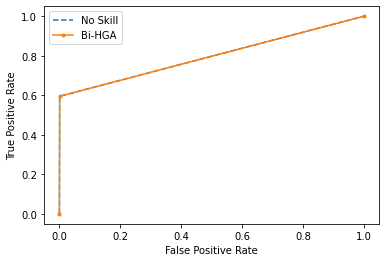

[0 0 0 ... 1 1 1]
Epoch 1/20
180785/180785 [==============================] - 124s 686us/step - loss: 0.0510 - accuracy: 0.9790 - val_loss: 0.0529 - val_accuracy: 0.9724
Epoch 2/20
180785/180785 [==============================] - 121s 669us/step - loss: 0.0503 - accuracy: 0.9793 - val_loss: 0.0504 - val_accuracy: 0.9788
Epoch 3/20
180785/180785 [==============================] - 119s 656us/step - loss: 0.0499 - accuracy: 0.9793 - val_loss: 0.0477 - val_accuracy: 0.9786
Epoch 4/20
180785/180785 [==============================] - 122s 674us/step - loss: 0.0495 - accuracy: 0.9795 - val_loss: 0.0465 - val_accuracy: 0.9813
Epoch 5/20
180785/180785 [==============================] - 123s 680us/step - loss: 0.0492 - accuracy: 0.9797 - val_loss: 0.0494 - val_accuracy: 0.9816
Epoch 6/20
180785/180785 [==============================] - 122s 673us/step - loss: 0.0487 - accuracy: 0.9797 - val_loss: 0.0493 - val_accuracy: 0.9789
Epoch 7/20
180785/180785 [==============================] - 119s 659us

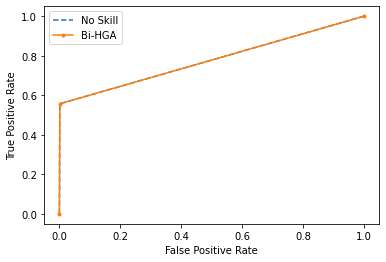

[0 0 0 ... 1 1 1]
Epoch 1/20
180785/180785 [==============================] - 120s 664us/step - loss: 0.0505 - accuracy: 0.9803 - val_loss: 0.0577 - val_accuracy: 0.9820
Epoch 2/20
180785/180785 [==============================] - 118s 652us/step - loss: 0.0601 - accuracy: 0.9790 - val_loss: 0.0537 - val_accuracy: 0.9829
Epoch 3/20
180785/180785 [==============================] - 119s 656us/step - loss: 0.0575 - accuracy: 0.9794 - val_loss: 0.0564 - val_accuracy: 0.9787
Epoch 4/20
180785/180785 [==============================] - 117s 650us/step - loss: 0.0560 - accuracy: 0.9791 - val_loss: 0.0514 - val_accuracy: 0.9796
Epoch 5/20
180785/180785 [==============================] - 118s 650us/step - loss: 0.0550 - accuracy: 0.9793 - val_loss: 0.0525 - val_accuracy: 0.9804
Epoch 6/20
180785/180785 [==============================] - 118s 653us/step - loss: 0.0544 - accuracy: 0.9792 - val_loss: 0.0498 - val_accuracy: 0.9787
Epoch 7/20
180785/180785 [==============================] - 118s 651us

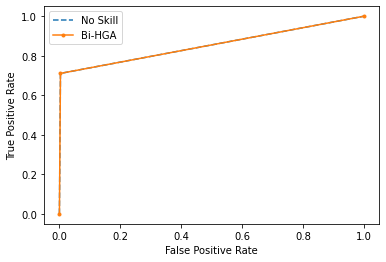

[0 0 0 ... 1 1 1]
Epoch 1/20
180785/180785 [==============================] - 118s 651us/step - loss: 0.0476 - accuracy: 0.9801 - val_loss: 0.0435 - val_accuracy: 0.9819
Epoch 2/20
180785/180785 [==============================] - 119s 656us/step - loss: 0.0474 - accuracy: 0.9801 - val_loss: 0.0461 - val_accuracy: 0.9800
Epoch 3/20
180785/180785 [==============================] - 120s 666us/step - loss: 0.0472 - accuracy: 0.9802 - val_loss: 0.0511 - val_accuracy: 0.9787
Epoch 4/20
180785/180785 [==============================] - 117s 649us/step - loss: 0.0470 - accuracy: 0.9805 - val_loss: 0.0438 - val_accuracy: 0.9810
Epoch 5/20
180785/180785 [==============================] - 118s 653us/step - loss: 0.0468 - accuracy: 0.9804 - val_loss: 0.0462 - val_accuracy: 0.9827
Epoch 6/20
180785/180785 [==============================] - 121s 672us/step - loss: 0.0468 - accuracy: 0.9804 - val_loss: 0.0503 - val_accuracy: 0.9789
Epoch 7/20
180785/180785 [==============================] - 119s 660us

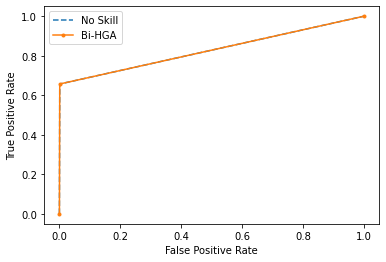

[0 0 0 ... 1 1 1]
Cross Validation AUC = 0.8142269674940887
Cross Validation accuracy = 0.9770761216964757
Cross Validation f1 = 0.758862528704615
Cross Validation precision = 0.9604615103268828
Cross Validation recall = 0.6301147226829884
Cross Validation fpr = [0.         0.00053254 0.5       ]
Cross Validation tpr = [0.         0.32862431 0.5       ]


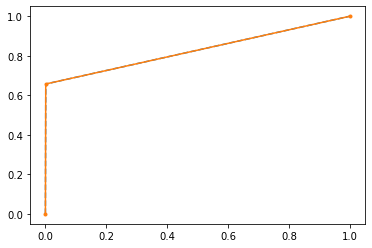

In [12]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from numpy import arange
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

kf = KFold(n_splits=4,shuffle=True,random_state=None)

scores = []
aucs=0
f1s=0
recalls=0
precisions=0
accuracys=0

for train_index, test_index in kf.split(X):
    x_train, x_val = X[train_index], X[test_index]
    y_train, y_val = y[train_index], y[test_index]
    
    model.fit(x_train, y_train, epochs=20, batch_size=10, validation_data=(x_val, y_val))
    
    # make probability predictions with the model
    predictions = model.predict(x_val)
    # round predictions 
    rounded = [round(x[0]) for x in predictions]
    
    # make class predictions with the model
    predictions = model.predict_classes(x_val)
    
    # evaluate the keras model
    _, accuracy = model.evaluate(X, y)
    print('overall Accuracy: %.2f' % (accuracy*100))
    
    print(confusion_matrix(y_val,predictions,labels=[1,0]))
    
    #No need for threshold setting since getting same value   
    accuracy=accuracy_score(y_val,predictions)
    print('accuracy: %f' % accuracy)
    
    f1=f1_score(y_val,predictions)
    print('f1 score: %f' % f1)    
    
    precision=precision_score(y_val,predictions)
    print('precision score: %f' % precision)
    
    recall=recall_score(y_val,predictions)
    print('recall score: %f' % recall)
    
    auc = roc_auc_score(y_val, predictions)
    print('ROC AUC: %f' % auc)    
    
    ns_auc = roc_auc_score(y_val, predictions)
    print('ROC AUC: %f' % auc)  
    
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    
    #https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/#:~:text=with%20sample%20code).-,ROC%20Curves%20and%20AUC%20in%20Python,probabilities%20for%20the%201%20class.
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_val, predictions)
    fpr, tpr, _ = roc_curve(y_val, predictions)
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(fpr, tpr, marker='.', label='Bi-HGA')

    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

    print(y_val)
    
    aucs += auc
    accuracys += accuracy
    f1s += f1
    precisions += precision
    recalls += recall
    ns_fpr+=ns_fpr
    ns_tpr+=ns_tpr
    fpr+=fpr
    tpr+=tpr
print("Cross Validation AUC = {}".format(aucs/4))
print("Cross Validation accuracy = {}".format(accuracys/4))
print("Cross Validation f1 = {}".format(f1s/4))
print("Cross Validation precision = {}".format(precisions/4))
print("Cross Validation recall = {}".format(recalls/4))
print("Cross Validation fpr = {}".format(fpr/4))
print("Cross Validation tpr = {}".format(tpr/4))
ns_fpr, ns_tpr, _ = roc_curve(y_val, predictions)
fpr, tpr, _ = roc_curve(y_val, predictions)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Bi-HGA')


In [13]:
end = datetime.datetime.now()

diff = (end - start)

datetime.timedelta(seconds=10, microseconds=885206)

diff_seconds = int(diff.total_seconds())

minute_seconds, seconds = divmod(diff_seconds, 60)
hours, minutes = divmod(minute_seconds, 60)
hms = f"{hours}h {minutes}m {seconds}s"

'0h 0m 10s'
print(hms) 

2h 45m 18s


In [14]:
#https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/#:~:text=Optimal%20Threshold%20for%20Precision%2DRecall%20Curve,-Unlike%20the%20ROC&text=Recall%20is%20calculated%20as%20the,positives%20and%20the%20false%20negatives.
#Optimal Threshold Tuning
# search thresholds for imbalanced classification
from numpy import arange
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix 
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')
 
# predict probabilities
#yhat = model.predict_proba(x_val)
# keep probabilities for the positive outcome only
#probs = yhat[:, 1]
# define thresholds
thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_val, to_labels(yhat_probs, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

NameError: name 'yhat_probs' is not defined

In [ ]:
# evaluate each threshold
scores = [accuracy_score(y_val, to_labels(yhat_probs, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, Accuracy-Score=%.5f' % (thresholds[ix], scores[ix]))

In [ ]:
# evaluate each threshold
scores = [precision_score(y_val, to_labels(yhat_probs, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, Precision-Score=%.5f' % (thresholds[ix], scores[ix]))

In [ ]:
# evaluate each threshold
scores = [recall_score(y_val, to_labels(yhat_probs, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, recall-Score=%.5f' % (thresholds[ix], scores[ix]))

In [ ]:
from sklearn.metrics import roc_auc_score
# ROC AUC
auc = roc_auc_score(y_val, yhat_probs)
print('ROC AUC: %f' % auc)